# Principal Component Analysis of data set *10x-68k-PMBC* - subset 1300 samples



In [ ]:
# Dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Mount drive
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [ ]:
# Set paths
path_root = '/drive/My Drive/Deep Learning/github/'
path_input = path_root + 'data/raw/'
path_output = path_root + 'data/pca/'
path_results = path_root + 'results/pca/'

In [ ]:
# Import 10x-68k-PMBC data 
df = pd.read_csv(path_input + 'subset1300_counts.tsv.gz', compression='gzip', header=None, sep='\t', index_col=0, quotechar='"', error_bad_lines=False)[0:1300]
classes = pd.read_csv(path_input + 'subset1300_celltypes.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False).celltype[0:1300]

In [ ]:
# Compute PCA

## Standarization
X = df.values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## Decomposition
pca_10  = PCA(n_components=10,  random_state=2020)
pca_25  = PCA(n_components=25,  random_state=2020)
pca_50  = PCA(n_components=50,  random_state=2020)
pca_100 = PCA(n_components=100, random_state=2020)

X_pca_10  = pca_10.fit(X_scaled).transform(X_scaled)
X_pca_25  = pca_25.fit(X_scaled).transform(X_scaled)
X_pca_50  = pca_50.fit(X_scaled).transform(X_scaled)
X_pca_100 = pca_100.fit(X_scaled).transform(X_scaled)

% Variance explained by all 10 principal components = 4.64
% Variance explained by all 25 principal components = 8.24
% Variance explained by all 50 principal components = 12.99
% Variance explained by all 100 principal components = 20.3


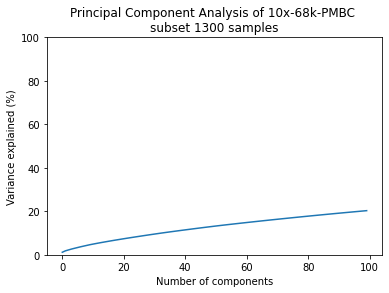

In [ ]:
# Evaluate variance explained
print("% Variance explained by all 10 principal components =",
      round(sum(pca_10.explained_variance_ratio_ * 100), 2))

print("% Variance explained by all 25 principal components =",
      round(sum(pca_25.explained_variance_ratio_ * 100), 2))

print("% Variance explained by all 50 principal components =",
      round(sum(pca_50.explained_variance_ratio_ * 100), 2))

print("% Variance explained by all 100 principal components =",
      round(sum(pca_100.explained_variance_ratio_ * 100), 2))

# Plot explained variance 
plt.plot(np.cumsum(pca_100.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Variance explained (%)")
plt.title("Principal Component Analysis of 10x-68k-PMBC \nsubset 1300 samples")
plt.ylim(0, 100)
plt.savefig('pca_variance_explained.png')

In [46]:
# Save PCA data
pd.DataFrame(X_pca_10).to_csv(path_output + 'pca_10.tsv', sep='\t')
pd.DataFrame(X_pca_25).to_csv(path_output + 'pca_25.tsv', sep='\t')
pd.DataFrame(X_pca_50).to_csv(path_output + 'pca_50.tsv', sep='\t')
pd.DataFrame(X_pca_100).to_csv(path_output + 'pca_100.tsv', sep='\t')